<a href="https://colab.research.google.com/github/rajthakkar18/AirBNB-Booking-Database/blob/main/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
!gdown 12cgRU3lOjPOIVt-iKPDZhhqaJBCN2EBH

Downloading...
From: https://drive.google.com/uc?id=12cgRU3lOjPOIVt-iKPDZhhqaJBCN2EBH
To: /content/HousePricePrediction.xlsx
100% 219k/219k [00:00<00:00, 96.1MB/s]


In [46]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_excel('HousePricePrediction.xlsx')
# Printing first 5 records of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [48]:
df.shape  #checking the dimension

(2919, 13)

**Data PreProcessing**

Now, we categorize the features depending on their datatype (int, float, object) and then calculate their total number.

In [49]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 6
Float variables: 3


**Exploratory Data Analysis**

EDA refers to the deep analysis of data so as to discover different patterns and spot anomalies. Before making inferences from data it is essential to examine all the variables.

In [50]:
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numerical_df.corr(method='spearman')

# Plot the correlation matrix with a gradient color map
corr.style.background_gradient(cmap='coolwarm')

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
Id,1.000000,0.010335,-0.015878,0.002473,-0.015458,-0.044102,0.006067,-0.023581,-0.018546
MSSubClass,0.010335,1.000000,-0.314604,-0.063699,0.033315,0.016209,-0.097622,-0.303210,0.007192
LotArea,-0.015878,-0.314604,1.000000,-0.081013,0.123510,0.102956,0.060635,0.354959,0.456461
OverallCond,0.002473,-0.063699,-0.081013,1.000000,-0.421910,-0.075559,0.097081,-0.224125,-0.129325
YearBuilt,-0.015458,0.033315,0.123510,-0.421910,1.000000,0.707957,-0.096544,0.442782,0.652682
YearRemodAdd,-0.044102,0.016209,0.102956,-0.075559,0.707957,1.000000,-0.117366,0.310457,0.571159
BsmtFinSF2,0.006067,-0.097622,0.060635,0.097081,-0.096544,-0.117366,1.000000,0.062634,-0.038806
TotalBsmtSF,-0.023581,-0.303210,0.354959,-0.224125,0.442782,0.310457,0.062634,1.000000,0.602725
SalePrice,-0.018546,0.007192,0.456461,-0.129325,0.652682,0.571159,-0.038806,0.602725,1.000000


To analyze the different categorical features, we can draw a barplot.

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

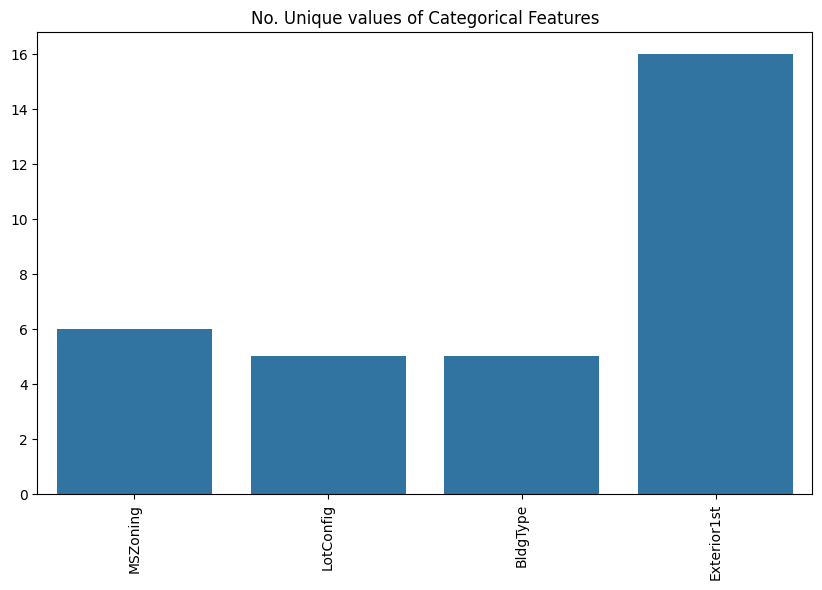

In [51]:
#Analyzing categorical variables

unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)


The plot shows that Exterior1st has around 16 unique categories and other features have around  6 unique categories. To findout the actual count of each category we can plot the bargraph of each four features separately.

<ipython-input-52-2201045250cd>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


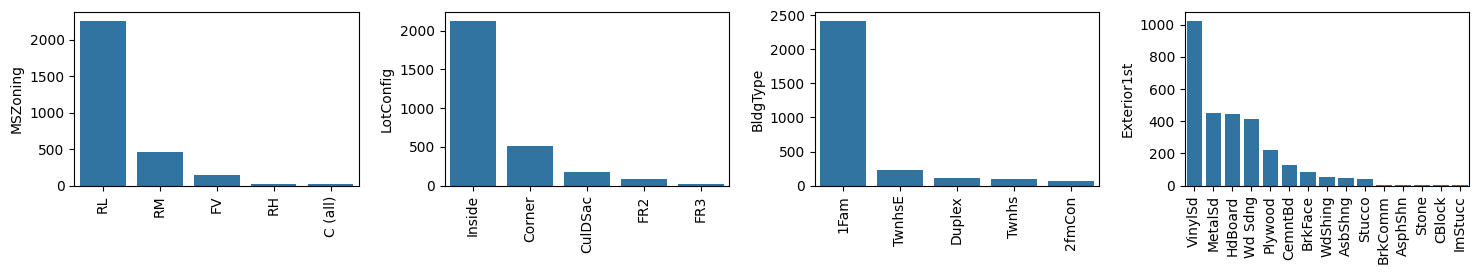

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and object_cols is defined
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)

# Define your y-axis labels for each categorical feature
y_labels = ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

index = 1
for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)

    # Set the y-axis label based on the current index
    if index <= len(y_labels):
        plt.ylabel(y_labels[index - 1])  # Adjust for 0-based indexing

    index += 1
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)


**Data Cleaning**

Data Cleaning is the way to improvise the data or remove incorrect, corrupted or irrelevant data.

As in our dataset, there are some columns that are not important and irrelevant for the model training. So, we can drop that column before training. There are 2 approaches to dealing with empty/null values

We can easily delete the column/row (if the feature or record is not much important).
Filling the empty slots with mean/mode/0/NA/etc. (depending on the dataset requirement).
As Id Column will not be participating in any prediction. So we can Drop it.

In [53]:
#As Id Column will not be participating in any prediction. So we can Drop it.
df.drop(['Id'],
             axis=1,
             inplace=True)

In [54]:
#counting the total nulls in every column
null_counts = df.isnull().sum()
print(null_counts)


MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64


Replacing SalePrice empty values with their mean values to make the data distribution symmetric.

In [89]:
df['SalePrice'] = df['SalePrice'].fillna(
  df['SalePrice'].mean())

Drop records with null values (as the empty records are very less).

In [56]:
new_df = df.dropna()

Checking features which have null values in the new dataframe (if there are still any).

In [57]:
new_df.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0
BsmtFinSF2,0


In [58]:
object_cols = new_df.select_dtypes(include='object').columns
print("Categorical variables:")
print(list(object_cols))
print("No. of categorical features:", len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of categorical features: 4


In [59]:
# creating dummy variables for categorical variables

df_final = pd.get_dummies(new_df, columns=object_cols, drop_first=False)
df_final.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,False,False,...,False,False,False,True,False,False,False,False,False,False
2,60,11250,5,2001,2002,0.0,920.0,223500.0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,70,9550,5,1915,1970,0.0,756.0,140000.0,False,False,...,False,False,False,False,False,False,False,False,True,False
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,False,False,...,False,False,False,False,False,False,False,True,False,False


Splitting Dataset into Training and Testing
X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

In [76]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)


**Model and Accuracy**

As we have to train the model to determine the continuous values, so we will be using these regression models.

SVM-Support Vector Machine

Random Forest Regressor

Linear Regressor

SVM – Support vector Machine

In [81]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
y_pred_svr = model_SVR.predict(X_test)

print(mean_absolute_percentage_error(y_test, y_pred_svr))


0.1870512931870423


Random Forest Regression

Random Forest is an ensemble technique that uses multiple of decision trees and can be used for both regression and classification tasks.

In [82]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, y_train)
y_pred_rfr = model_RFR.predict(X_test)

mean_absolute_percentage_error(y_test, y_pred_rfr)


0.18942070992237525

Linear Regression predicts the final output-dependent value based on the given independent features. Like, here we have to predict SalePrice depending on features like MSSubClass, YearBuilt, BldgType, Exterior1st etc.

In [83]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
y_pred_lr = model_LR.predict(X_test)

print(mean_absolute_percentage_error(y_test, y_pred_lr))


0.1874168384159986


Conclusion
Clearly, SVM model is giving better accuracy as the mean absolute error is the least among all the other regressor models i.e. 0.18 approx

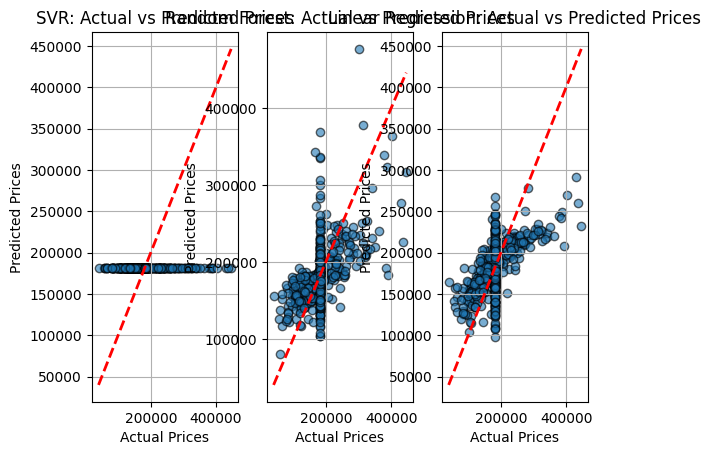

In [90]:
# SVR Scatter Plot
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_svr, alpha=0.6, edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('SVR: Actual vs Predicted Prices')
plt.grid()

# Random Forest Scatter Plot
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rfr, alpha=0.6, edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.grid()

# Linear Regression Scatter Plot
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lr, alpha=0.6, edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.grid()

# Show all plots

plt.show()